Här är två visualiserade exempel.

1.  ****Temporal tidsserie****: En simulerad aktiekurs genererad med
    **geometrisk brownsk rörelse** (Geometric Brownian Motion), vilket
    är en standardmodell för aktiepriser. Kurvan visar hur priset
    utvecklas över 252 handelsdagar.

2.  ****Spatial Poissonprocess****: Slumpmässigt genererade punkter i
    ett 10×10 område, där antalet punkter följer en Poissonfördelning
    med intensitet λ = 5 per areaenhet. Punkternas positioner är
    oberoende och likformigt fördelade, vilket är karakteristiskt för en
    homogen spatial Poissonprocess.

Båda exemplen illustrerar grundläggande stokastiska processer inom sina
respektive domäner – tid respektive rum.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

### Aktiekurser 

Den kontinuerliga processen $S_t$ (stock price) i vektorn `price`. Notera att processen har en lognormal fördelning och att $\log S_t$ är $\log S_0$ plus en wienerprocess.

In [7]:
# 1. Temporal Time Series (e.g., Simulated Stock Price using Geometric Brownian Motion)
T = 252  # Number of trading days in a year
mu = 0.0002  # Daily drift
sigma = 0.01  # Daily volatility
S0 = 100  # Initial price

# Generate the time series
t = np.arange(T)
# Generate random returns
returns = np.random.normal(loc=mu, scale=sigma, size=T) # Diskret-tid vitt brus
# Pris
price = S0 * np.exp(np.cumsum(returns))

### Den spatiala poissonprocessen.

En poisson punktprocess i en rektangel kan representeras med två vektorer
`x_points` och `y_points` som båda är samplade från den likformiga fördelningen.
Längden på vektorerna (antalet punkter i rektangeln) är poissonfördelat.

In [8]:

# 2. Spatial Poisson Process
# Define the region [0, 10] x [0, 10]
x_min, x_max = 0, 10
y_min, y_max = 0, 10
area = (x_max - x_min) * (y_max - y_min)
lambda_intensity = 5  # Average number of points per unit area

En  homogen poissonprocess kan genereras på följande sätt: 1. Generera antalet punkter i en area. 2. Generera punkterna likformigt i arean. 

In [4]:

N = np.random.poisson(lambda_intensity * area)  # Total number of points

# Punkternas fördelning givet antalet punkter är likformigt
x_points = np.random.uniform(x_min, x_max, N)
y_points = np.random.uniform(y_min, y_max, N)


Plotta båda processerna.

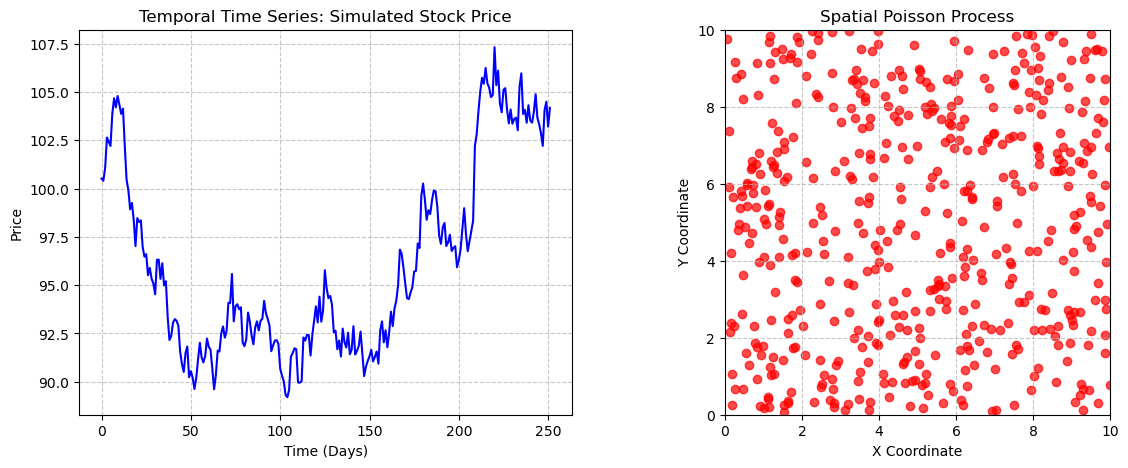

In [9]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temporal Time Series Plot
axes[0].plot(t, price, color='blue')
axes[0].set_title('Temporal Time Series: Simulated Stock Price')
axes[0].set_xlabel('Time (Days)')
axes[0].set_ylabel('Price')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Spatial Poisson Process Plot
axes[1].scatter(x_points, y_points, color='red', alpha=0.7)
axes[1].set_title('Spatial Poisson Process')
axes[1].set_xlabel('X Coordinate')
axes[1].set_ylabel('Y Coordinate')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_aspect('equal', adjustable='box')

# plt.tight_layout()
plt.show()

# Uppgift: Poissonprocess i en cirkel

Skapa en homogen poissonprocess som genererar punkter i en cirkel. Kom ihåg att
antal punkter i cirkeln skall vara poissonfördelat med parameter
$\lambda\times\text{Area}$. Generera punkter i en omgivande kvadrat och filtrera
bort de som

Använd paketet `pandas`.

[[https://www.geeksforgeeks.org/pandas/ways-to-filter-pandas-dataframe-by-column-values/][Länk som beskriver pandas filter funktioner.]]



In [ ]:
import pandas as pd

